In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

from sklearn.ensemble import RandomForestClassifier

from math import sqrt

from keras.models import Sequential
from keras.layers import CuDNNLSTM, Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam
#from keras.datasets import mnist

from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

In [17]:
currency_list = ['USDCHF10080',
                 #'GBPUSD10080', 'EURUSD10080', 'USDJPY10080', 'USDCAD10080', 'AUDUSD10080', 'NZDUSD10080',
                 #'GBPCHF10080', 'EURCHF10080', 'CHFJPY10080', 'CADCHF10080', 'AUDCHF10080', 'NZDCHF10080', 'EURGBP10080',
                 #'GBPJPY10080', 'GBPCAD10080', 'GBPAUD10080', 'EURJPY10080', 'EURCAD10080', 'EURAUD10080', 'EURNZD10080',
                #'CADJPY10080', 'AUDJPY10080', 'NZDJPY10080', 'AUDCAD10080', 'NZDCAD10080', 'AUDNZD10080'
                ]



# for q in currency_list:
    
#     errors = []
    
#     for x in range(5):

#         currency = q.replace('10080','')

#         data = pd.read_excel('files/currency_training_data/' + currency +'_combine_data_dataframe.xlsx', sheet_name=0)
#         #data = data.head(695)


#         X = data.drop(columns=['Unnamed: 0', 
#                                'date_start',  'nextweek_class',


#                               ])



#         y = data['nextweek_class']

#         X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 )



#         lnr= LinearRegression()
#         lnr.fit(X_train, y_train)
#         y_predict = lnr.predict(X_test)
        
        
#         error = sqrt(mean_squared_error(y_test, y_pred))
#         errors.append(error)
       
        
#     average_error = sum(errors)/len(errors)
       
#     print(q + " Linear regression Average " + str(average_error))
    
    
   


In [18]:
for q in currency_list:
    
    errors = []
    
    for x in range(1):

        currency = q.replace('10080','')

        data = pd.read_excel('files/currency_training_data/' + currency +'_combine_data_dataframe.xlsx', sheet_name=0)
        #data = data.head(695)


        X = data.drop(columns=['Unnamed: 0', 
                               'date_start',  'nextweek_class',


                              ])



        y = data['nextweek_class']
      
    
        

        #print(X.shape)
        
        
        # after scaling the df, resulted in "scaled_dataset"
        sequences = 5
        result = []
        # for loop will walk for each of the 1500 rows
        for i in range(0,len(X)):
            # every group must have the same length, so if current loop position i + number 
            # of sequences is higher than df length, breaks
            if i+sequences <= len(X):
                # this will add into the list as [[R1a,R1b...R1t],[R2a,R2b...R2t],...[R5a,R5b...R5t]]
                result.append(X[i:i+sequences].values)
        # Converting to array + keras takes float32 better than 64
        train_x = np.array(result)
        #train_x  = train_x.astype('float32')
        # making the y into same length as X
        train_y = np.array(y.head(len(train_x)).values)

        print(train_x.shape, train_y.shape)
        #print(train_x[len(train_x)-10])
        #print(train_y[len(train_x)-10])
        
        X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size = 0.2 )

       
        
       
        #Initializing the classifier Network
        classifier = Sequential()

        #Adding the input LSTM network layer
        #classifier.add(CuDNNLSTM(128, input_shape=(X_train.shape[1:]), return_sequences=True))
        classifier.add(LSTM(10, input_shape=(train_x.shape[1:]), return_sequences=True))
        classifier.add(LSTM(10, input_shape=(train_x.shape[1:]), return_sequences=True))
        classifier.add(LSTM(10,  return_sequences=False))
        #classifier.add(Dropout(0.2))
        #Adding a second LSTM network layer
        
        #classifier.add(LSTM(128))
        #Adding a dense hidden layer
        #classifier.add(Dense(64, activation='relu'))
        #classifier.add(Dropout(0.2))

        #Adding the output layer
        #classifier.add(Dense(35, activation='softmax'))
      
        #Compiling the network
        classifier.compile( loss='mean_absolute_error',
                      optimizer=Adam(learning_rate=0.001, decay=1e-6),
                      metrics=['accuracy'] )
        
        print(classifier.summary())

        #Fitting the data to the model
        history = classifier.fit(X_train,
                 y_train,
                  epochs=3500,
                  validation_data=(X_test, y_test))


(3493, 5, 27) (3493,)
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 5, 10)             1520      
_________________________________________________________________
lstm_10 (LSTM)               (None, 5, 10)             840       
_________________________________________________________________
lstm_11 (LSTM)               (None, 10)                840       
Total params: 3,200
Trainable params: 3,200
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/3500
88/88 [==============================] - 4s 16ms/step - loss: 9.4224 - accuracy: 0.0365 - val_loss: 9.1960 - val_accuracy: 0.0372
Epoch 2/3500
88/88 [==============================] - 1s 7ms/step - loss: 9.4205 - accuracy: 0.0354 - val_loss: 9.1956 - val_accuracy: 0.0372
Epoch 3/3500
88/88 [==============================] - 1s 7ms/step - lo

Epoch 53/3500
88/88 [==============================] - 1s 7ms/step - loss: 9.0564 - accuracy: 0.0268 - val_loss: 9.1912 - val_accuracy: 0.0286
Epoch 54/3500
88/88 [==============================] - 1s 7ms/step - loss: 9.0458 - accuracy: 0.0293 - val_loss: 9.1712 - val_accuracy: 0.0286
Epoch 55/3500
88/88 [==============================] - 1s 7ms/step - loss: 9.0413 - accuracy: 0.0290 - val_loss: 9.1834 - val_accuracy: 0.0343
Epoch 56/3500
88/88 [==============================] - 1s 7ms/step - loss: 9.0427 - accuracy: 0.0268 - val_loss: 9.1974 - val_accuracy: 0.0300
Epoch 57/3500
88/88 [==============================] - 1s 7ms/step - loss: 9.0296 - accuracy: 0.0243 - val_loss: 9.2005 - val_accuracy: 0.0343
Epoch 58/3500
88/88 [==============================] - 1s 7ms/step - loss: 9.0560 - accuracy: 0.0261 - val_loss: 9.1812 - val_accuracy: 0.0258
Epoch 59/3500
88/88 [==============================] - 1s 7ms/step - loss: 9.0478 - accuracy: 0.0240 - val_loss: 9.1798 - val_accuracy: 0.0315

88/88 [==============================] - 1s 6ms/step - loss: 9.0154 - accuracy: 0.0236 - val_loss: 9.2218 - val_accuracy: 0.0243
Epoch 111/3500
88/88 [==============================] - 1s 7ms/step - loss: 9.0253 - accuracy: 0.0240 - val_loss: 9.2171 - val_accuracy: 0.0243
Epoch 112/3500
88/88 [==============================] - 1s 7ms/step - loss: 9.0176 - accuracy: 0.0225 - val_loss: 9.2083 - val_accuracy: 0.0258
Epoch 113/3500
88/88 [==============================] - 1s 6ms/step - loss: 9.0277 - accuracy: 0.0233 - val_loss: 9.1838 - val_accuracy: 0.0258
Epoch 114/3500
88/88 [==============================] - 1s 6ms/step - loss: 9.0180 - accuracy: 0.0261 - val_loss: 9.2055 - val_accuracy: 0.0200
Epoch 115/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.9982 - accuracy: 0.0240 - val_loss: 9.2062 - val_accuracy: 0.0157
Epoch 116/3500
88/88 [==============================] - 1s 7ms/step - loss: 9.0038 - accuracy: 0.0251 - val_loss: 9.2399 - val_accuracy: 0.0200
Epoch 1

Epoch 167/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.9630 - accuracy: 0.0247 - val_loss: 9.2195 - val_accuracy: 0.0186
Epoch 168/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.9567 - accuracy: 0.0240 - val_loss: 9.2168 - val_accuracy: 0.0229
Epoch 169/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.9881 - accuracy: 0.0258 - val_loss: 9.2094 - val_accuracy: 0.0215
Epoch 170/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.9810 - accuracy: 0.0229 - val_loss: 9.2013 - val_accuracy: 0.0172
Epoch 171/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.9997 - accuracy: 0.0240 - val_loss: 9.2041 - val_accuracy: 0.0200
Epoch 172/3500
88/88 [==============================] - 1s 7ms/step - loss: 8.9972 - accuracy: 0.0258 - val_loss: 9.1959 - val_accuracy: 0.0186
Epoch 173/3500
88/88 [==============================] - 1s 6ms/step - loss: 9.0179 - accuracy: 0.0268 - val_loss: 9.1858 - val_accuracy:

Epoch 224/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.9713 - accuracy: 0.0218 - val_loss: 9.2010 - val_accuracy: 0.0200
Epoch 225/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.9712 - accuracy: 0.0215 - val_loss: 9.2042 - val_accuracy: 0.0143
Epoch 226/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.9713 - accuracy: 0.0208 - val_loss: 9.2040 - val_accuracy: 0.0086
Epoch 227/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.9767 - accuracy: 0.0229 - val_loss: 9.2065 - val_accuracy: 0.0114
Epoch 228/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.9682 - accuracy: 0.0229 - val_loss: 9.2226 - val_accuracy: 0.0100
Epoch 229/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.9492 - accuracy: 0.0225 - val_loss: 9.2499 - val_accuracy: 0.0129
Epoch 230/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.9451 - accuracy: 0.0222 - val_loss: 9.2301 - val_accuracy:

Epoch 281/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.9352 - accuracy: 0.0236 - val_loss: 9.2323 - val_accuracy: 0.0143
Epoch 282/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.9418 - accuracy: 0.0247 - val_loss: 9.2481 - val_accuracy: 0.0114
Epoch 283/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.9435 - accuracy: 0.0251 - val_loss: 9.2250 - val_accuracy: 0.0129
Epoch 284/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.9454 - accuracy: 0.0218 - val_loss: 9.2308 - val_accuracy: 0.0143
Epoch 285/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.9665 - accuracy: 0.0215 - val_loss: 9.2237 - val_accuracy: 0.0100
Epoch 286/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.9602 - accuracy: 0.0240 - val_loss: 9.2374 - val_accuracy: 0.0143
Epoch 287/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.9722 - accuracy: 0.0247 - val_loss: 9.2251 - val_accuracy:

Epoch 338/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.9008 - accuracy: 0.0247 - val_loss: 9.2314 - val_accuracy: 0.0186
Epoch 339/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.8955 - accuracy: 0.0236 - val_loss: 9.2208 - val_accuracy: 0.0186
Epoch 340/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.8934 - accuracy: 0.0211 - val_loss: 9.2287 - val_accuracy: 0.0186
Epoch 341/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.8945 - accuracy: 0.0218 - val_loss: 9.2378 - val_accuracy: 0.0157
Epoch 342/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.8932 - accuracy: 0.0222 - val_loss: 9.2291 - val_accuracy: 0.0157
Epoch 343/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.9067 - accuracy: 0.0229 - val_loss: 9.2396 - val_accuracy: 0.0129
Epoch 344/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.9086 - accuracy: 0.0251 - val_loss: 9.2342 - val_accuracy:

Epoch 395/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.8988 - accuracy: 0.0218 - val_loss: 9.2209 - val_accuracy: 0.0172
Epoch 396/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.8898 - accuracy: 0.0215 - val_loss: 9.2319 - val_accuracy: 0.0157
Epoch 397/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.8798 - accuracy: 0.0222 - val_loss: 9.2336 - val_accuracy: 0.0172
Epoch 398/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.8841 - accuracy: 0.0218 - val_loss: 9.2148 - val_accuracy: 0.0215
Epoch 399/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.8883 - accuracy: 0.0236 - val_loss: 9.2238 - val_accuracy: 0.0186
Epoch 400/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.9096 - accuracy: 0.0222 - val_loss: 9.2094 - val_accuracy: 0.0200
Epoch 401/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.9114 - accuracy: 0.0240 - val_loss: 9.2193 - val_accuracy:

Epoch 452/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.8860 - accuracy: 0.0236 - val_loss: 9.2079 - val_accuracy: 0.0200
Epoch 453/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.8876 - accuracy: 0.0215 - val_loss: 9.1939 - val_accuracy: 0.0215
Epoch 454/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.9042 - accuracy: 0.0208 - val_loss: 9.1936 - val_accuracy: 0.0258
Epoch 455/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.9204 - accuracy: 0.0211 - val_loss: 9.1997 - val_accuracy: 0.0200
Epoch 456/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.9069 - accuracy: 0.0211 - val_loss: 9.1929 - val_accuracy: 0.0215
Epoch 457/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.8896 - accuracy: 0.0215 - val_loss: 9.2114 - val_accuracy: 0.0243
Epoch 458/3500
88/88 [==============================] - 0s 6ms/step - loss: 8.8824 - accuracy: 0.0243 - val_loss: 9.1797 - val_accuracy:

Epoch 509/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.8983 - accuracy: 0.0215 - val_loss: 9.2067 - val_accuracy: 0.0215
Epoch 510/3500
88/88 [==============================] - 0s 6ms/step - loss: 8.8847 - accuracy: 0.0233 - val_loss: 9.2046 - val_accuracy: 0.0243
Epoch 511/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.8822 - accuracy: 0.0243 - val_loss: 9.1928 - val_accuracy: 0.0243
Epoch 512/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.8827 - accuracy: 0.0240 - val_loss: 9.1808 - val_accuracy: 0.0215
Epoch 513/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.8852 - accuracy: 0.0261 - val_loss: 9.1630 - val_accuracy: 0.0229
Epoch 514/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.8821 - accuracy: 0.0258 - val_loss: 9.1707 - val_accuracy: 0.0243
Epoch 515/3500
88/88 [==============================] - 0s 6ms/step - loss: 8.8779 - accuracy: 0.0268 - val_loss: 9.1540 - val_accuracy:

Epoch 566/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.8786 - accuracy: 0.0272 - val_loss: 9.1934 - val_accuracy: 0.0258
Epoch 567/3500
88/88 [==============================] - 0s 5ms/step - loss: 8.8752 - accuracy: 0.0243 - val_loss: 9.1669 - val_accuracy: 0.0315
Epoch 568/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.8675 - accuracy: 0.0251 - val_loss: 9.1610 - val_accuracy: 0.0258
Epoch 569/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.8692 - accuracy: 0.0236 - val_loss: 9.1635 - val_accuracy: 0.0258
Epoch 570/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.8881 - accuracy: 0.0225 - val_loss: 9.1812 - val_accuracy: 0.0272
Epoch 571/3500
88/88 [==============================] - 0s 6ms/step - loss: 8.8819 - accuracy: 0.0251 - val_loss: 9.1809 - val_accuracy: 0.0258
Epoch 572/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.8670 - accuracy: 0.0240 - val_loss: 9.1802 - val_accuracy:

Epoch 623/3500
88/88 [==============================] - 1s 7ms/step - loss: 8.8561 - accuracy: 0.0236 - val_loss: 9.1414 - val_accuracy: 0.0243
Epoch 624/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.8564 - accuracy: 0.0218 - val_loss: 9.1565 - val_accuracy: 0.0215
Epoch 625/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.8582 - accuracy: 0.0229 - val_loss: 9.1458 - val_accuracy: 0.0229
Epoch 626/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.8665 - accuracy: 0.0233 - val_loss: 9.1295 - val_accuracy: 0.0272
Epoch 627/3500
88/88 [==============================] - 0s 6ms/step - loss: 8.8679 - accuracy: 0.0247 - val_loss: 9.1440 - val_accuracy: 0.0229
Epoch 628/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.8607 - accuracy: 0.0208 - val_loss: 9.1498 - val_accuracy: 0.0229
Epoch 629/3500
88/88 [==============================] - 0s 6ms/step - loss: 8.8753 - accuracy: 0.0204 - val_loss: 9.1559 - val_accuracy:

Epoch 680/3500
88/88 [==============================] - 1s 7ms/step - loss: 8.8217 - accuracy: 0.0236 - val_loss: 9.1895 - val_accuracy: 0.0315
Epoch 681/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.8262 - accuracy: 0.0229 - val_loss: 9.1917 - val_accuracy: 0.0300
Epoch 682/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.8361 - accuracy: 0.0233 - val_loss: 9.2011 - val_accuracy: 0.0272
Epoch 683/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.8337 - accuracy: 0.0208 - val_loss: 9.1982 - val_accuracy: 0.0200
Epoch 684/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.8429 - accuracy: 0.0243 - val_loss: 9.1879 - val_accuracy: 0.0229
Epoch 685/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.8414 - accuracy: 0.0236 - val_loss: 9.1896 - val_accuracy: 0.0243
Epoch 686/3500
88/88 [==============================] - 1s 7ms/step - loss: 8.8453 - accuracy: 0.0218 - val_loss: 9.1870 - val_accuracy:

Epoch 737/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.8436 - accuracy: 0.0240 - val_loss: 9.1813 - val_accuracy: 0.0200
Epoch 738/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.8632 - accuracy: 0.0251 - val_loss: 9.1914 - val_accuracy: 0.0243
Epoch 739/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.8776 - accuracy: 0.0236 - val_loss: 9.1968 - val_accuracy: 0.0229
Epoch 740/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.8730 - accuracy: 0.0247 - val_loss: 9.1954 - val_accuracy: 0.0215
Epoch 741/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.8698 - accuracy: 0.0236 - val_loss: 9.1760 - val_accuracy: 0.0157
Epoch 742/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.8827 - accuracy: 0.0236 - val_loss: 9.1598 - val_accuracy: 0.0215
Epoch 743/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.8741 - accuracy: 0.0229 - val_loss: 9.1964 - val_accuracy:

Epoch 794/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.8493 - accuracy: 0.0225 - val_loss: 9.1645 - val_accuracy: 0.0172
Epoch 795/3500
88/88 [==============================] - 1s 7ms/step - loss: 8.8460 - accuracy: 0.0233 - val_loss: 9.1683 - val_accuracy: 0.0215
Epoch 796/3500
88/88 [==============================] - 1s 7ms/step - loss: 8.8642 - accuracy: 0.0243 - val_loss: 9.1546 - val_accuracy: 0.0200
Epoch 797/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.8540 - accuracy: 0.0204 - val_loss: 9.1922 - val_accuracy: 0.0186
Epoch 798/3500
88/88 [==============================] - 1s 7ms/step - loss: 8.8501 - accuracy: 0.0243 - val_loss: 9.1999 - val_accuracy: 0.0243
Epoch 799/3500
88/88 [==============================] - 1s 7ms/step - loss: 8.8701 - accuracy: 0.0233 - val_loss: 9.1853 - val_accuracy: 0.0286
Epoch 800/3500
88/88 [==============================] - 1s 7ms/step - loss: 8.8552 - accuracy: 0.0229 - val_loss: 9.1988 - val_accuracy:

Epoch 851/3500
88/88 [==============================] - 1s 7ms/step - loss: 8.8316 - accuracy: 0.0240 - val_loss: 9.2027 - val_accuracy: 0.0215
Epoch 852/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.8309 - accuracy: 0.0261 - val_loss: 9.2124 - val_accuracy: 0.0172
Epoch 853/3500
88/88 [==============================] - 1s 7ms/step - loss: 8.8343 - accuracy: 0.0301 - val_loss: 9.1825 - val_accuracy: 0.0243
Epoch 854/3500
88/88 [==============================] - 1s 7ms/step - loss: 8.8431 - accuracy: 0.0297 - val_loss: 9.1942 - val_accuracy: 0.0243
Epoch 855/3500
88/88 [==============================] - 1s 7ms/step - loss: 8.8376 - accuracy: 0.0272 - val_loss: 9.1865 - val_accuracy: 0.0186
Epoch 856/3500
88/88 [==============================] - 1s 7ms/step - loss: 8.8294 - accuracy: 0.0279 - val_loss: 9.1747 - val_accuracy: 0.0200
Epoch 857/3500
88/88 [==============================] - 1s 7ms/step - loss: 8.8496 - accuracy: 0.0297 - val_loss: 9.1858 - val_accuracy:

Epoch 908/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.8077 - accuracy: 0.0301 - val_loss: 9.1639 - val_accuracy: 0.0143
Epoch 909/3500
88/88 [==============================] - 0s 6ms/step - loss: 8.8153 - accuracy: 0.0258 - val_loss: 9.1488 - val_accuracy: 0.0143
Epoch 910/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.8269 - accuracy: 0.0279 - val_loss: 9.1403 - val_accuracy: 0.0172
Epoch 911/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.8135 - accuracy: 0.0290 - val_loss: 9.1396 - val_accuracy: 0.0157
Epoch 912/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.8041 - accuracy: 0.0286 - val_loss: 9.1462 - val_accuracy: 0.0229
Epoch 913/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7996 - accuracy: 0.0286 - val_loss: 9.1325 - val_accuracy: 0.0172
Epoch 914/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7963 - accuracy: 0.0258 - val_loss: 9.1351 - val_accuracy:

Epoch 965/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.8041 - accuracy: 0.0261 - val_loss: 9.1831 - val_accuracy: 0.0186
Epoch 966/3500
88/88 [==============================] - 0s 6ms/step - loss: 8.8177 - accuracy: 0.0261 - val_loss: 9.1628 - val_accuracy: 0.0215
Epoch 967/3500
88/88 [==============================] - 0s 6ms/step - loss: 8.8123 - accuracy: 0.0258 - val_loss: 9.1818 - val_accuracy: 0.0157
Epoch 968/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.8088 - accuracy: 0.0261 - val_loss: 9.1831 - val_accuracy: 0.0200
Epoch 969/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7975 - accuracy: 0.0276 - val_loss: 9.1748 - val_accuracy: 0.0172
Epoch 970/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.8143 - accuracy: 0.0261 - val_loss: 9.1784 - val_accuracy: 0.0200
Epoch 971/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.8249 - accuracy: 0.0276 - val_loss: 9.1666 - val_accuracy:

Epoch 1022/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.8038 - accuracy: 0.0268 - val_loss: 9.1602 - val_accuracy: 0.0129
Epoch 1023/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.8181 - accuracy: 0.0243 - val_loss: 9.1765 - val_accuracy: 0.0172
Epoch 1024/3500
88/88 [==============================] - 0s 6ms/step - loss: 8.8206 - accuracy: 0.0276 - val_loss: 9.1615 - val_accuracy: 0.0200
Epoch 1025/3500
88/88 [==============================] - 0s 6ms/step - loss: 8.8172 - accuracy: 0.0254 - val_loss: 9.1859 - val_accuracy: 0.0129
Epoch 1026/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.8259 - accuracy: 0.0251 - val_loss: 9.2045 - val_accuracy: 0.0172
Epoch 1027/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.8194 - accuracy: 0.0272 - val_loss: 9.1781 - val_accuracy: 0.0172
Epoch 1028/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.8197 - accuracy: 0.0286 - val_loss: 9.1885 - val_ac

88/88 [==============================] - 1s 6ms/step - loss: 8.8081 - accuracy: 0.0279 - val_loss: 9.1407 - val_accuracy: 0.0215
Epoch 1079/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.8065 - accuracy: 0.0304 - val_loss: 9.1425 - val_accuracy: 0.0172
Epoch 1080/3500
88/88 [==============================] - 0s 6ms/step - loss: 8.8080 - accuracy: 0.0333 - val_loss: 9.1493 - val_accuracy: 0.0186
Epoch 1081/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.8100 - accuracy: 0.0279 - val_loss: 9.1409 - val_accuracy: 0.0086
Epoch 1082/3500
88/88 [==============================] - 0s 6ms/step - loss: 8.8015 - accuracy: 0.0290 - val_loss: 9.1477 - val_accuracy: 0.0129
Epoch 1083/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.8028 - accuracy: 0.0279 - val_loss: 9.1626 - val_accuracy: 0.0143
Epoch 1084/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.8083 - accuracy: 0.0268 - val_loss: 9.1553 - val_accuracy: 0.0172
E

88/88 [==============================] - 1s 6ms/step - loss: 8.8341 - accuracy: 0.0261 - val_loss: 9.1552 - val_accuracy: 0.0243
Epoch 1135/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.8287 - accuracy: 0.0293 - val_loss: 9.1703 - val_accuracy: 0.0229
Epoch 1136/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.8164 - accuracy: 0.0272 - val_loss: 9.1485 - val_accuracy: 0.0229
Epoch 1137/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.8057 - accuracy: 0.0293 - val_loss: 9.1527 - val_accuracy: 0.0272
Epoch 1138/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.8005 - accuracy: 0.0308 - val_loss: 9.1582 - val_accuracy: 0.0300
Epoch 1139/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7981 - accuracy: 0.0293 - val_loss: 9.1807 - val_accuracy: 0.0143
Epoch 1140/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7985 - accuracy: 0.0251 - val_loss: 9.1901 - val_accuracy: 0.0243
E

88/88 [==============================] - 1s 6ms/step - loss: 8.7923 - accuracy: 0.0261 - val_loss: 9.1543 - val_accuracy: 0.0172
Epoch 1191/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7810 - accuracy: 0.0276 - val_loss: 9.1637 - val_accuracy: 0.0200
Epoch 1192/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7772 - accuracy: 0.0283 - val_loss: 9.1673 - val_accuracy: 0.0172
Epoch 1193/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7736 - accuracy: 0.0283 - val_loss: 9.1600 - val_accuracy: 0.0143
Epoch 1194/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7705 - accuracy: 0.0279 - val_loss: 9.1708 - val_accuracy: 0.0172
Epoch 1195/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7782 - accuracy: 0.0290 - val_loss: 9.1746 - val_accuracy: 0.0243
Epoch 1196/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7812 - accuracy: 0.0265 - val_loss: 9.1748 - val_accuracy: 0.0229
E

88/88 [==============================] - 1s 6ms/step - loss: 8.8305 - accuracy: 0.0251 - val_loss: 9.1765 - val_accuracy: 0.0157
Epoch 1247/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.8594 - accuracy: 0.0261 - val_loss: 9.1655 - val_accuracy: 0.0143
Epoch 1248/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.8487 - accuracy: 0.0251 - val_loss: 9.1444 - val_accuracy: 0.0143
Epoch 1249/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.8464 - accuracy: 0.0243 - val_loss: 9.1662 - val_accuracy: 0.0200
Epoch 1250/3500
88/88 [==============================] - 0s 6ms/step - loss: 8.8331 - accuracy: 0.0251 - val_loss: 9.1845 - val_accuracy: 0.0172
Epoch 1251/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.8214 - accuracy: 0.0279 - val_loss: 9.1875 - val_accuracy: 0.0200
Epoch 1252/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.8164 - accuracy: 0.0265 - val_loss: 9.1845 - val_accuracy: 0.0229
E

88/88 [==============================] - 1s 6ms/step - loss: 8.7890 - accuracy: 0.0286 - val_loss: 9.1728 - val_accuracy: 0.0200
Epoch 1303/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7814 - accuracy: 0.0283 - val_loss: 9.1726 - val_accuracy: 0.0172
Epoch 1304/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7860 - accuracy: 0.0286 - val_loss: 9.1447 - val_accuracy: 0.0200
Epoch 1305/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7969 - accuracy: 0.0297 - val_loss: 9.1547 - val_accuracy: 0.0186
Epoch 1306/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.8151 - accuracy: 0.0297 - val_loss: 9.1865 - val_accuracy: 0.0215
Epoch 1307/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.8112 - accuracy: 0.0243 - val_loss: 9.1848 - val_accuracy: 0.0172
Epoch 1308/3500
88/88 [==============================] - 0s 6ms/step - loss: 8.8028 - accuracy: 0.0236 - val_loss: 9.1350 - val_accuracy: 0.0157
E

88/88 [==============================] - 1s 7ms/step - loss: 8.7956 - accuracy: 0.0268 - val_loss: 9.1585 - val_accuracy: 0.0172
Epoch 1359/3500
88/88 [==============================] - 1s 7ms/step - loss: 8.7922 - accuracy: 0.0243 - val_loss: 9.1313 - val_accuracy: 0.0229
Epoch 1360/3500
88/88 [==============================] - 1s 7ms/step - loss: 8.7881 - accuracy: 0.0247 - val_loss: 9.1493 - val_accuracy: 0.0243
Epoch 1361/3500
88/88 [==============================] - 1s 7ms/step - loss: 8.7845 - accuracy: 0.0247 - val_loss: 9.1604 - val_accuracy: 0.0186
Epoch 1362/3500
88/88 [==============================] - 1s 7ms/step - loss: 8.7788 - accuracy: 0.0261 - val_loss: 9.1661 - val_accuracy: 0.0215
Epoch 1363/3500
88/88 [==============================] - 1s 7ms/step - loss: 8.7789 - accuracy: 0.0276 - val_loss: 9.1650 - val_accuracy: 0.0215
Epoch 1364/3500
88/88 [==============================] - 1s 7ms/step - loss: 8.7748 - accuracy: 0.0283 - val_loss: 9.1717 - val_accuracy: 0.0186
E

88/88 [==============================] - 1s 7ms/step - loss: 8.7821 - accuracy: 0.0233 - val_loss: 9.1621 - val_accuracy: 0.0186
Epoch 1415/3500
88/88 [==============================] - 1s 7ms/step - loss: 8.8079 - accuracy: 0.0247 - val_loss: 9.1713 - val_accuracy: 0.0300
Epoch 1416/3500
88/88 [==============================] - 1s 7ms/step - loss: 8.7959 - accuracy: 0.0229 - val_loss: 9.1583 - val_accuracy: 0.0272
Epoch 1417/3500
88/88 [==============================] - 1s 7ms/step - loss: 8.7886 - accuracy: 0.0247 - val_loss: 9.1701 - val_accuracy: 0.0243
Epoch 1418/3500
88/88 [==============================] - 1s 7ms/step - loss: 8.7826 - accuracy: 0.0261 - val_loss: 9.1658 - val_accuracy: 0.0258
Epoch 1419/3500
88/88 [==============================] - 1s 7ms/step - loss: 8.7796 - accuracy: 0.0258 - val_loss: 9.1696 - val_accuracy: 0.0286
Epoch 1420/3500
88/88 [==============================] - 1s 7ms/step - loss: 8.7825 - accuracy: 0.0229 - val_loss: 9.1838 - val_accuracy: 0.0229
E

88/88 [==============================] - 1s 7ms/step - loss: 8.7984 - accuracy: 0.0311 - val_loss: 9.1659 - val_accuracy: 0.0172
Epoch 1471/3500
88/88 [==============================] - 1s 7ms/step - loss: 8.7835 - accuracy: 0.0308 - val_loss: 9.1587 - val_accuracy: 0.0200
Epoch 1472/3500
88/88 [==============================] - 1s 7ms/step - loss: 8.7823 - accuracy: 0.0340 - val_loss: 9.1682 - val_accuracy: 0.0258
Epoch 1473/3500
88/88 [==============================] - 1s 7ms/step - loss: 8.7745 - accuracy: 0.0326 - val_loss: 9.1569 - val_accuracy: 0.0200
Epoch 1474/3500
88/88 [==============================] - 1s 7ms/step - loss: 8.7707 - accuracy: 0.0308 - val_loss: 9.1358 - val_accuracy: 0.0215
Epoch 1475/3500
88/88 [==============================] - 1s 7ms/step - loss: 8.7736 - accuracy: 0.0311 - val_loss: 9.1438 - val_accuracy: 0.0215
Epoch 1476/3500
88/88 [==============================] - 1s 7ms/step - loss: 8.7852 - accuracy: 0.0319 - val_loss: 9.1417 - val_accuracy: 0.0200
E

88/88 [==============================] - 1s 6ms/step - loss: 8.8099 - accuracy: 0.0319 - val_loss: 9.1640 - val_accuracy: 0.0200
Epoch 1527/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.8158 - accuracy: 0.0311 - val_loss: 9.1542 - val_accuracy: 0.0215
Epoch 1528/3500
88/88 [==============================] - 1s 7ms/step - loss: 8.8133 - accuracy: 0.0358 - val_loss: 9.1707 - val_accuracy: 0.0172
Epoch 1529/3500
88/88 [==============================] - 1s 7ms/step - loss: 8.8122 - accuracy: 0.0304 - val_loss: 9.1734 - val_accuracy: 0.0215
Epoch 1530/3500
88/88 [==============================] - 1s 7ms/step - loss: 8.8007 - accuracy: 0.0311 - val_loss: 9.1707 - val_accuracy: 0.0229
Epoch 1531/3500
88/88 [==============================] - 1s 7ms/step - loss: 8.8007 - accuracy: 0.0315 - val_loss: 9.1615 - val_accuracy: 0.0186
Epoch 1532/3500
88/88 [==============================] - 1s 7ms/step - loss: 8.8056 - accuracy: 0.0304 - val_loss: 9.1486 - val_accuracy: 0.0215
E

88/88 [==============================] - 1s 7ms/step - loss: 8.7578 - accuracy: 0.0304 - val_loss: 9.1538 - val_accuracy: 0.0286
Epoch 1583/3500
88/88 [==============================] - 1s 7ms/step - loss: 8.7555 - accuracy: 0.0297 - val_loss: 9.1539 - val_accuracy: 0.0186
Epoch 1584/3500
88/88 [==============================] - 1s 7ms/step - loss: 8.7780 - accuracy: 0.0304 - val_loss: 9.1437 - val_accuracy: 0.0229
Epoch 1585/3500
88/88 [==============================] - 1s 7ms/step - loss: 8.7765 - accuracy: 0.0315 - val_loss: 9.1389 - val_accuracy: 0.0243
Epoch 1586/3500
88/88 [==============================] - 1s 7ms/step - loss: 8.7665 - accuracy: 0.0301 - val_loss: 9.1371 - val_accuracy: 0.0258
Epoch 1587/3500
88/88 [==============================] - 1s 7ms/step - loss: 8.7723 - accuracy: 0.0301 - val_loss: 9.1613 - val_accuracy: 0.0300
Epoch 1588/3500
88/88 [==============================] - 1s 7ms/step - loss: 8.7927 - accuracy: 0.0276 - val_loss: 9.1137 - val_accuracy: 0.0272
E

88/88 [==============================] - 1s 8ms/step - loss: 8.7662 - accuracy: 0.0354 - val_loss: 9.1615 - val_accuracy: 0.0286
Epoch 1639/3500
88/88 [==============================] - 1s 7ms/step - loss: 8.7711 - accuracy: 0.0354 - val_loss: 9.1731 - val_accuracy: 0.0243
Epoch 1640/3500
88/88 [==============================] - 1s 8ms/step - loss: 8.7624 - accuracy: 0.0344 - val_loss: 9.1791 - val_accuracy: 0.0229
Epoch 1641/3500
88/88 [==============================] - 1s 8ms/step - loss: 8.7610 - accuracy: 0.0333 - val_loss: 9.1723 - val_accuracy: 0.0258
Epoch 1642/3500
88/88 [==============================] - 1s 7ms/step - loss: 8.7616 - accuracy: 0.0329 - val_loss: 9.1719 - val_accuracy: 0.0258
Epoch 1643/3500
88/88 [==============================] - 1s 8ms/step - loss: 8.7622 - accuracy: 0.0308 - val_loss: 9.1714 - val_accuracy: 0.0258
Epoch 1644/3500
88/88 [==============================] - 1s 7ms/step - loss: 8.7659 - accuracy: 0.0336 - val_loss: 9.1569 - val_accuracy: 0.0300
E

88/88 [==============================] - 1s 7ms/step - loss: 8.7587 - accuracy: 0.0304 - val_loss: 9.1764 - val_accuracy: 0.0243
Epoch 1695/3500
88/88 [==============================] - 1s 7ms/step - loss: 8.7581 - accuracy: 0.0333 - val_loss: 9.1621 - val_accuracy: 0.0272
Epoch 1696/3500
88/88 [==============================] - 1s 7ms/step - loss: 8.7498 - accuracy: 0.0304 - val_loss: 9.1745 - val_accuracy: 0.0243
Epoch 1697/3500
88/88 [==============================] - 1s 7ms/step - loss: 8.7477 - accuracy: 0.0290 - val_loss: 9.1632 - val_accuracy: 0.0186
Epoch 1698/3500
88/88 [==============================] - 1s 7ms/step - loss: 8.7439 - accuracy: 0.0268 - val_loss: 9.1595 - val_accuracy: 0.0229
Epoch 1699/3500
88/88 [==============================] - 1s 7ms/step - loss: 8.7432 - accuracy: 0.0276 - val_loss: 9.1682 - val_accuracy: 0.0215
Epoch 1700/3500
88/88 [==============================] - 1s 7ms/step - loss: 8.7548 - accuracy: 0.0286 - val_loss: 9.1592 - val_accuracy: 0.0200
E

88/88 [==============================] - 1s 7ms/step - loss: 8.7910 - accuracy: 0.0279 - val_loss: 9.1983 - val_accuracy: 0.0258
Epoch 1751/3500
88/88 [==============================] - 1s 7ms/step - loss: 8.7883 - accuracy: 0.0304 - val_loss: 9.1938 - val_accuracy: 0.0243
Epoch 1752/3500
88/88 [==============================] - 1s 7ms/step - loss: 8.7717 - accuracy: 0.0279 - val_loss: 9.1781 - val_accuracy: 0.0229
Epoch 1753/3500
88/88 [==============================] - 1s 7ms/step - loss: 8.7770 - accuracy: 0.0265 - val_loss: 9.1982 - val_accuracy: 0.0258
Epoch 1754/3500
88/88 [==============================] - 1s 7ms/step - loss: 8.7937 - accuracy: 0.0290 - val_loss: 9.1954 - val_accuracy: 0.0215
Epoch 1755/3500
88/88 [==============================] - 1s 7ms/step - loss: 8.7957 - accuracy: 0.0265 - val_loss: 9.2055 - val_accuracy: 0.0258
Epoch 1756/3500
88/88 [==============================] - 1s 7ms/step - loss: 8.7786 - accuracy: 0.0265 - val_loss: 9.2009 - val_accuracy: 0.0258
E

88/88 [==============================] - 1s 6ms/step - loss: 8.7735 - accuracy: 0.0286 - val_loss: 9.1696 - val_accuracy: 0.0200
Epoch 1807/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7577 - accuracy: 0.0279 - val_loss: 9.1596 - val_accuracy: 0.0186
Epoch 1808/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7551 - accuracy: 0.0279 - val_loss: 9.1712 - val_accuracy: 0.0186
Epoch 1809/3500
88/88 [==============================] - 0s 6ms/step - loss: 8.7518 - accuracy: 0.0276 - val_loss: 9.1710 - val_accuracy: 0.0186
Epoch 1810/3500
88/88 [==============================] - 1s 7ms/step - loss: 8.7574 - accuracy: 0.0290 - val_loss: 9.1568 - val_accuracy: 0.0272
Epoch 1811/3500
88/88 [==============================] - 1s 7ms/step - loss: 8.7603 - accuracy: 0.0283 - val_loss: 9.1489 - val_accuracy: 0.0286
Epoch 1812/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7580 - accuracy: 0.0293 - val_loss: 9.1498 - val_accuracy: 0.0243
E

88/88 [==============================] - 1s 6ms/step - loss: 8.7543 - accuracy: 0.0301 - val_loss: 9.1378 - val_accuracy: 0.0329
Epoch 1863/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7528 - accuracy: 0.0319 - val_loss: 9.1420 - val_accuracy: 0.0300
Epoch 1864/3500
88/88 [==============================] - 1s 8ms/step - loss: 8.7559 - accuracy: 0.0301 - val_loss: 9.1430 - val_accuracy: 0.0315
Epoch 1865/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7664 - accuracy: 0.0315 - val_loss: 9.1361 - val_accuracy: 0.0329
Epoch 1866/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7751 - accuracy: 0.0308 - val_loss: 9.1557 - val_accuracy: 0.0272
Epoch 1867/3500
88/88 [==============================] - 1s 7ms/step - loss: 8.7631 - accuracy: 0.0308 - val_loss: 9.1398 - val_accuracy: 0.0272
Epoch 1868/3500
88/88 [==============================] - 1s 7ms/step - loss: 8.7642 - accuracy: 0.0293 - val_loss: 9.1597 - val_accuracy: 0.0272
E

88/88 [==============================] - 1s 6ms/step - loss: 8.7605 - accuracy: 0.0243 - val_loss: 9.1512 - val_accuracy: 0.0143
Epoch 1919/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7637 - accuracy: 0.0240 - val_loss: 9.1742 - val_accuracy: 0.0200
Epoch 1920/3500
88/88 [==============================] - 0s 6ms/step - loss: 8.7737 - accuracy: 0.0251 - val_loss: 9.1651 - val_accuracy: 0.0186
Epoch 1921/3500
88/88 [==============================] - 0s 6ms/step - loss: 8.7597 - accuracy: 0.0247 - val_loss: 9.1643 - val_accuracy: 0.0215
Epoch 1922/3500
88/88 [==============================] - 0s 6ms/step - loss: 8.7685 - accuracy: 0.0268 - val_loss: 9.1908 - val_accuracy: 0.0272
Epoch 1923/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7635 - accuracy: 0.0293 - val_loss: 9.2014 - val_accuracy: 0.0229
Epoch 1924/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7631 - accuracy: 0.0268 - val_loss: 9.2054 - val_accuracy: 0.0272
E

88/88 [==============================] - 1s 6ms/step - loss: 8.7367 - accuracy: 0.0276 - val_loss: 9.1786 - val_accuracy: 0.0272
Epoch 1975/3500
88/88 [==============================] - 1s 7ms/step - loss: 8.7279 - accuracy: 0.0261 - val_loss: 9.1632 - val_accuracy: 0.0243
Epoch 1976/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7208 - accuracy: 0.0243 - val_loss: 9.1532 - val_accuracy: 0.0286
Epoch 1977/3500
88/88 [==============================] - 1s 7ms/step - loss: 8.7268 - accuracy: 0.0243 - val_loss: 9.1503 - val_accuracy: 0.0286
Epoch 1978/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7227 - accuracy: 0.0261 - val_loss: 9.1611 - val_accuracy: 0.0300
Epoch 1979/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7212 - accuracy: 0.0254 - val_loss: 9.1628 - val_accuracy: 0.0315
Epoch 1980/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7234 - accuracy: 0.0218 - val_loss: 9.1575 - val_accuracy: 0.0300
E

88/88 [==============================] - 1s 7ms/step - loss: 8.7259 - accuracy: 0.0268 - val_loss: 9.1762 - val_accuracy: 0.0315
Epoch 2031/3500
88/88 [==============================] - 1s 7ms/step - loss: 8.7257 - accuracy: 0.0265 - val_loss: 9.1752 - val_accuracy: 0.0315
Epoch 2032/3500
88/88 [==============================] - 1s 7ms/step - loss: 8.7255 - accuracy: 0.0279 - val_loss: 9.1743 - val_accuracy: 0.0300
Epoch 2033/3500
88/88 [==============================] - 1s 7ms/step - loss: 8.7254 - accuracy: 0.0265 - val_loss: 9.1728 - val_accuracy: 0.0315
Epoch 2034/3500
88/88 [==============================] - 1s 7ms/step - loss: 8.7250 - accuracy: 0.0279 - val_loss: 9.1728 - val_accuracy: 0.0286
Epoch 2035/3500
88/88 [==============================] - 1s 7ms/step - loss: 8.7385 - accuracy: 0.0276 - val_loss: 9.1720 - val_accuracy: 0.0286
Epoch 2036/3500
88/88 [==============================] - 1s 7ms/step - loss: 8.7483 - accuracy: 0.0279 - val_loss: 9.1624 - val_accuracy: 0.0229
E

88/88 [==============================] - 1s 7ms/step - loss: 8.7280 - accuracy: 0.0268 - val_loss: 9.1673 - val_accuracy: 0.0286
Epoch 2087/3500
88/88 [==============================] - 1s 7ms/step - loss: 8.7301 - accuracy: 0.0276 - val_loss: 9.1614 - val_accuracy: 0.0300
Epoch 2088/3500
88/88 [==============================] - 1s 7ms/step - loss: 8.7332 - accuracy: 0.0265 - val_loss: 9.1598 - val_accuracy: 0.0286
Epoch 2089/3500
88/88 [==============================] - 1s 7ms/step - loss: 8.7298 - accuracy: 0.0279 - val_loss: 9.1726 - val_accuracy: 0.0258
Epoch 2090/3500
88/88 [==============================] - 1s 7ms/step - loss: 8.7362 - accuracy: 0.0315 - val_loss: 9.1499 - val_accuracy: 0.0258
Epoch 2091/3500
88/88 [==============================] - 1s 7ms/step - loss: 8.7419 - accuracy: 0.0276 - val_loss: 9.1671 - val_accuracy: 0.0243
Epoch 2092/3500
88/88 [==============================] - 1s 7ms/step - loss: 8.7370 - accuracy: 0.0276 - val_loss: 9.2021 - val_accuracy: 0.0243
E

88/88 [==============================] - 1s 6ms/step - loss: 8.7305 - accuracy: 0.0222 - val_loss: 9.1974 - val_accuracy: 0.0229
Epoch 2143/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7218 - accuracy: 0.0247 - val_loss: 9.2024 - val_accuracy: 0.0229
Epoch 2144/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7177 - accuracy: 0.0240 - val_loss: 9.1799 - val_accuracy: 0.0215
Epoch 2145/3500
88/88 [==============================] - 1s 7ms/step - loss: 8.7168 - accuracy: 0.0240 - val_loss: 9.1918 - val_accuracy: 0.0157
Epoch 2146/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7172 - accuracy: 0.0236 - val_loss: 9.1969 - val_accuracy: 0.0157
Epoch 2147/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7201 - accuracy: 0.0218 - val_loss: 9.2047 - val_accuracy: 0.0215
Epoch 2148/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7250 - accuracy: 0.0251 - val_loss: 9.2237 - val_accuracy: 0.0243
E

88/88 [==============================] - 1s 7ms/step - loss: 8.7298 - accuracy: 0.0251 - val_loss: 9.1748 - val_accuracy: 0.0215
Epoch 2199/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7362 - accuracy: 0.0229 - val_loss: 9.1987 - val_accuracy: 0.0300
Epoch 2200/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7311 - accuracy: 0.0265 - val_loss: 9.2057 - val_accuracy: 0.0315
Epoch 2201/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7289 - accuracy: 0.0261 - val_loss: 9.1956 - val_accuracy: 0.0286
Epoch 2202/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7330 - accuracy: 0.0254 - val_loss: 9.2078 - val_accuracy: 0.0300
Epoch 2203/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7276 - accuracy: 0.0279 - val_loss: 9.1945 - val_accuracy: 0.0272
Epoch 2204/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7260 - accuracy: 0.0265 - val_loss: 9.1916 - val_accuracy: 0.0243
E

88/88 [==============================] - 1s 6ms/step - loss: 8.7432 - accuracy: 0.0229 - val_loss: 9.1607 - val_accuracy: 0.0229
Epoch 2255/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7458 - accuracy: 0.0222 - val_loss: 9.1803 - val_accuracy: 0.0172
Epoch 2256/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7466 - accuracy: 0.0254 - val_loss: 9.1774 - val_accuracy: 0.0143
Epoch 2257/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7354 - accuracy: 0.0247 - val_loss: 9.1798 - val_accuracy: 0.0186
Epoch 2258/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7354 - accuracy: 0.0240 - val_loss: 9.1814 - val_accuracy: 0.0215
Epoch 2259/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7275 - accuracy: 0.0236 - val_loss: 9.1771 - val_accuracy: 0.0186
Epoch 2260/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7303 - accuracy: 0.0251 - val_loss: 9.1843 - val_accuracy: 0.0258
E

88/88 [==============================] - 1s 6ms/step - loss: 8.7389 - accuracy: 0.0251 - val_loss: 9.1988 - val_accuracy: 0.0200
Epoch 2311/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7433 - accuracy: 0.0276 - val_loss: 9.1796 - val_accuracy: 0.0258
Epoch 2312/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7375 - accuracy: 0.0286 - val_loss: 9.2057 - val_accuracy: 0.0243
Epoch 2313/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7364 - accuracy: 0.0276 - val_loss: 9.2012 - val_accuracy: 0.0215
Epoch 2314/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7246 - accuracy: 0.0290 - val_loss: 9.1901 - val_accuracy: 0.0200
Epoch 2315/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7229 - accuracy: 0.0276 - val_loss: 9.1832 - val_accuracy: 0.0215
Epoch 2316/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7214 - accuracy: 0.0279 - val_loss: 9.1732 - val_accuracy: 0.0186
E

88/88 [==============================] - 1s 6ms/step - loss: 8.7448 - accuracy: 0.0265 - val_loss: 9.1985 - val_accuracy: 0.0229
Epoch 2367/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7382 - accuracy: 0.0268 - val_loss: 9.1843 - val_accuracy: 0.0200
Epoch 2368/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7353 - accuracy: 0.0247 - val_loss: 9.1899 - val_accuracy: 0.0200
Epoch 2369/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7304 - accuracy: 0.0236 - val_loss: 9.1860 - val_accuracy: 0.0243
Epoch 2370/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7196 - accuracy: 0.0247 - val_loss: 9.1944 - val_accuracy: 0.0229
Epoch 2371/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7177 - accuracy: 0.0261 - val_loss: 9.1923 - val_accuracy: 0.0243
Epoch 2372/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7163 - accuracy: 0.0258 - val_loss: 9.1812 - val_accuracy: 0.0215
E

88/88 [==============================] - 1s 6ms/step - loss: 8.6966 - accuracy: 0.0240 - val_loss: 9.1924 - val_accuracy: 0.0172
Epoch 2423/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.6965 - accuracy: 0.0254 - val_loss: 9.1945 - val_accuracy: 0.0157
Epoch 2424/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7009 - accuracy: 0.0243 - val_loss: 9.1845 - val_accuracy: 0.0172
Epoch 2425/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7081 - accuracy: 0.0247 - val_loss: 9.1788 - val_accuracy: 0.0157
Epoch 2426/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7184 - accuracy: 0.0276 - val_loss: 9.1852 - val_accuracy: 0.0129
Epoch 2427/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7227 - accuracy: 0.0240 - val_loss: 9.1801 - val_accuracy: 0.0186
Epoch 2428/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7214 - accuracy: 0.0283 - val_loss: 9.2080 - val_accuracy: 0.0200
E

88/88 [==============================] - 1s 6ms/step - loss: 8.7041 - accuracy: 0.0297 - val_loss: 9.1713 - val_accuracy: 0.0172
Epoch 2479/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7022 - accuracy: 0.0315 - val_loss: 9.1828 - val_accuracy: 0.0200
Epoch 2480/3500
88/88 [==============================] - 0s 6ms/step - loss: 8.6995 - accuracy: 0.0315 - val_loss: 9.1786 - val_accuracy: 0.0229
Epoch 2481/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.6991 - accuracy: 0.0304 - val_loss: 9.1938 - val_accuracy: 0.0200
Epoch 2482/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7021 - accuracy: 0.0319 - val_loss: 9.1883 - val_accuracy: 0.0172
Epoch 2483/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.6974 - accuracy: 0.0293 - val_loss: 9.1731 - val_accuracy: 0.0186
Epoch 2484/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7007 - accuracy: 0.0272 - val_loss: 9.1718 - val_accuracy: 0.0186
E

88/88 [==============================] - 0s 6ms/step - loss: 8.7148 - accuracy: 0.0268 - val_loss: 9.1798 - val_accuracy: 0.0258
Epoch 2535/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7145 - accuracy: 0.0268 - val_loss: 9.1806 - val_accuracy: 0.0258
Epoch 2536/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7127 - accuracy: 0.0268 - val_loss: 9.1842 - val_accuracy: 0.0243
Epoch 2537/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7100 - accuracy: 0.0268 - val_loss: 9.1831 - val_accuracy: 0.0215
Epoch 2538/3500
88/88 [==============================] - 0s 6ms/step - loss: 8.7078 - accuracy: 0.0276 - val_loss: 9.1811 - val_accuracy: 0.0215
Epoch 2539/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7067 - accuracy: 0.0279 - val_loss: 9.1818 - val_accuracy: 0.0186
Epoch 2540/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7065 - accuracy: 0.0272 - val_loss: 9.1826 - val_accuracy: 0.0215
E

88/88 [==============================] - 1s 6ms/step - loss: 8.6963 - accuracy: 0.0276 - val_loss: 9.1957 - val_accuracy: 0.0200
Epoch 2591/3500
88/88 [==============================] - 0s 6ms/step - loss: 8.7016 - accuracy: 0.0258 - val_loss: 9.1838 - val_accuracy: 0.0286
Epoch 2592/3500
88/88 [==============================] - 0s 6ms/step - loss: 8.7079 - accuracy: 0.0279 - val_loss: 9.2093 - val_accuracy: 0.0258
Epoch 2593/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7092 - accuracy: 0.0265 - val_loss: 9.2119 - val_accuracy: 0.0272
Epoch 2594/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7304 - accuracy: 0.0279 - val_loss: 9.1915 - val_accuracy: 0.0215
Epoch 2595/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7228 - accuracy: 0.0258 - val_loss: 9.1854 - val_accuracy: 0.0243
Epoch 2596/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7109 - accuracy: 0.0251 - val_loss: 9.1953 - val_accuracy: 0.0200
E

88/88 [==============================] - 1s 6ms/step - loss: 8.6840 - accuracy: 0.0251 - val_loss: 9.2033 - val_accuracy: 0.0243
Epoch 2647/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.6840 - accuracy: 0.0243 - val_loss: 9.2033 - val_accuracy: 0.0243
Epoch 2648/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.6839 - accuracy: 0.0247 - val_loss: 9.2032 - val_accuracy: 0.0243
Epoch 2649/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.6839 - accuracy: 0.0254 - val_loss: 9.2036 - val_accuracy: 0.0243
Epoch 2650/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.6838 - accuracy: 0.0251 - val_loss: 9.2051 - val_accuracy: 0.0243
Epoch 2651/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.6838 - accuracy: 0.0251 - val_loss: 9.2047 - val_accuracy: 0.0243
Epoch 2652/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.6831 - accuracy: 0.0247 - val_loss: 9.2041 - val_accuracy: 0.0243
E

88/88 [==============================] - 1s 6ms/step - loss: 8.6883 - accuracy: 0.0283 - val_loss: 9.1629 - val_accuracy: 0.0215
Epoch 2703/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.6988 - accuracy: 0.0286 - val_loss: 9.1684 - val_accuracy: 0.0272
Epoch 2704/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7023 - accuracy: 0.0265 - val_loss: 9.1817 - val_accuracy: 0.0186
Epoch 2705/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.6979 - accuracy: 0.0265 - val_loss: 9.1837 - val_accuracy: 0.0157
Epoch 2706/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.6884 - accuracy: 0.0272 - val_loss: 9.1803 - val_accuracy: 0.0129
Epoch 2707/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.6856 - accuracy: 0.0265 - val_loss: 9.1786 - val_accuracy: 0.0129
Epoch 2708/3500
88/88 [==============================] - 0s 6ms/step - loss: 8.6832 - accuracy: 0.0254 - val_loss: 9.1836 - val_accuracy: 0.0114
E

88/88 [==============================] - 1s 6ms/step - loss: 8.7311 - accuracy: 0.0265 - val_loss: 9.1716 - val_accuracy: 0.0229
Epoch 2759/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7250 - accuracy: 0.0265 - val_loss: 9.1753 - val_accuracy: 0.0186
Epoch 2760/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7290 - accuracy: 0.0261 - val_loss: 9.1721 - val_accuracy: 0.0143
Epoch 2761/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7163 - accuracy: 0.0283 - val_loss: 9.1869 - val_accuracy: 0.0172
Epoch 2762/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7208 - accuracy: 0.0283 - val_loss: 9.1618 - val_accuracy: 0.0200
Epoch 2763/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7082 - accuracy: 0.0272 - val_loss: 9.1652 - val_accuracy: 0.0143
Epoch 2764/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7016 - accuracy: 0.0290 - val_loss: 9.1640 - val_accuracy: 0.0186
E

88/88 [==============================] - 1s 6ms/step - loss: 8.7311 - accuracy: 0.0251 - val_loss: 9.1835 - val_accuracy: 0.0215
Epoch 2815/3500
88/88 [==============================] - 0s 5ms/step - loss: 8.7307 - accuracy: 0.0254 - val_loss: 9.1728 - val_accuracy: 0.0300
Epoch 2816/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7390 - accuracy: 0.0258 - val_loss: 9.1990 - val_accuracy: 0.0272
Epoch 2817/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7204 - accuracy: 0.0251 - val_loss: 9.2034 - val_accuracy: 0.0258
Epoch 2818/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7293 - accuracy: 0.0258 - val_loss: 9.1627 - val_accuracy: 0.0258
Epoch 2819/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7331 - accuracy: 0.0283 - val_loss: 9.1697 - val_accuracy: 0.0172
Epoch 2820/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7103 - accuracy: 0.0247 - val_loss: 9.1843 - val_accuracy: 0.0186
E

88/88 [==============================] - 1s 6ms/step - loss: 8.6859 - accuracy: 0.0251 - val_loss: 9.1919 - val_accuracy: 0.0186
Epoch 2871/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.6843 - accuracy: 0.0254 - val_loss: 9.2009 - val_accuracy: 0.0229
Epoch 2872/3500
88/88 [==============================] - 0s 6ms/step - loss: 8.7146 - accuracy: 0.0286 - val_loss: 9.2235 - val_accuracy: 0.0243
Epoch 2873/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7154 - accuracy: 0.0261 - val_loss: 9.2078 - val_accuracy: 0.0300
Epoch 2874/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7087 - accuracy: 0.0272 - val_loss: 9.2011 - val_accuracy: 0.0343
Epoch 2875/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.6988 - accuracy: 0.0268 - val_loss: 9.1936 - val_accuracy: 0.0229
Epoch 2876/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7167 - accuracy: 0.0225 - val_loss: 9.2095 - val_accuracy: 0.0243
E

88/88 [==============================] - 1s 6ms/step - loss: 8.6861 - accuracy: 0.0204 - val_loss: 9.1707 - val_accuracy: 0.0229
Epoch 2927/3500
88/88 [==============================] - 0s 6ms/step - loss: 8.6872 - accuracy: 0.0211 - val_loss: 9.1793 - val_accuracy: 0.0229
Epoch 2928/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.6877 - accuracy: 0.0233 - val_loss: 9.1693 - val_accuracy: 0.0215
Epoch 2929/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.6919 - accuracy: 0.0243 - val_loss: 9.1809 - val_accuracy: 0.0243
Epoch 2930/3500
88/88 [==============================] - 0s 6ms/step - loss: 8.7321 - accuracy: 0.0233 - val_loss: 9.1838 - val_accuracy: 0.0258
Epoch 2931/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7063 - accuracy: 0.0240 - val_loss: 9.1717 - val_accuracy: 0.0243
Epoch 2932/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7007 - accuracy: 0.0265 - val_loss: 9.1695 - val_accuracy: 0.0243
E

88/88 [==============================] - 1s 7ms/step - loss: 8.6929 - accuracy: 0.0254 - val_loss: 9.1920 - val_accuracy: 0.0258
Epoch 2983/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.6908 - accuracy: 0.0251 - val_loss: 9.1666 - val_accuracy: 0.0258
Epoch 2984/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.6938 - accuracy: 0.0258 - val_loss: 9.1785 - val_accuracy: 0.0300
Epoch 2985/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.6947 - accuracy: 0.0261 - val_loss: 9.1719 - val_accuracy: 0.0286
Epoch 2986/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.6913 - accuracy: 0.0254 - val_loss: 9.1663 - val_accuracy: 0.0272
Epoch 2987/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.6900 - accuracy: 0.0247 - val_loss: 9.1622 - val_accuracy: 0.0272
Epoch 2988/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.6907 - accuracy: 0.0247 - val_loss: 9.1644 - val_accuracy: 0.0272
E

88/88 [==============================] - 1s 6ms/step - loss: 8.7365 - accuracy: 0.0268 - val_loss: 9.2051 - val_accuracy: 0.0243
Epoch 3039/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7275 - accuracy: 0.0225 - val_loss: 9.2088 - val_accuracy: 0.0343
Epoch 3040/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7176 - accuracy: 0.0233 - val_loss: 9.2161 - val_accuracy: 0.0286
Epoch 3041/3500
88/88 [==============================] - 0s 6ms/step - loss: 8.7151 - accuracy: 0.0261 - val_loss: 9.2104 - val_accuracy: 0.0286
Epoch 3042/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7083 - accuracy: 0.0261 - val_loss: 9.2148 - val_accuracy: 0.0315
Epoch 3043/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7012 - accuracy: 0.0265 - val_loss: 9.2109 - val_accuracy: 0.0286
Epoch 3044/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7037 - accuracy: 0.0240 - val_loss: 9.2002 - val_accuracy: 0.0243
E

88/88 [==============================] - 1s 6ms/step - loss: 8.6814 - accuracy: 0.0261 - val_loss: 9.2114 - val_accuracy: 0.0358
Epoch 3095/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.6807 - accuracy: 0.0251 - val_loss: 9.2091 - val_accuracy: 0.0329
Epoch 3096/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.6799 - accuracy: 0.0251 - val_loss: 9.2069 - val_accuracy: 0.0329
Epoch 3097/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.6799 - accuracy: 0.0243 - val_loss: 9.2064 - val_accuracy: 0.0329
Epoch 3098/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.6798 - accuracy: 0.0247 - val_loss: 9.2056 - val_accuracy: 0.0329
Epoch 3099/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.6798 - accuracy: 0.0243 - val_loss: 9.2072 - val_accuracy: 0.0343
Epoch 3100/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.6790 - accuracy: 0.0236 - val_loss: 9.2066 - val_accuracy: 0.0343
E

88/88 [==============================] - 1s 6ms/step - loss: 8.7076 - accuracy: 0.0279 - val_loss: 9.1867 - val_accuracy: 0.0343
Epoch 3151/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7049 - accuracy: 0.0283 - val_loss: 9.1919 - val_accuracy: 0.0272
Epoch 3152/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7172 - accuracy: 0.0251 - val_loss: 9.1876 - val_accuracy: 0.0258
Epoch 3153/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7112 - accuracy: 0.0254 - val_loss: 9.2028 - val_accuracy: 0.0215
Epoch 3154/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.6962 - accuracy: 0.0261 - val_loss: 9.1859 - val_accuracy: 0.0229
Epoch 3155/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7063 - accuracy: 0.0261 - val_loss: 9.1960 - val_accuracy: 0.0215
Epoch 3156/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.6976 - accuracy: 0.0276 - val_loss: 9.2107 - val_accuracy: 0.0215
E

88/88 [==============================] - 0s 6ms/step - loss: 8.6802 - accuracy: 0.0211 - val_loss: 9.2085 - val_accuracy: 0.0286
Epoch 3207/3500
88/88 [==============================] - 1s 7ms/step - loss: 8.6993 - accuracy: 0.0229 - val_loss: 9.2261 - val_accuracy: 0.0229
Epoch 3208/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7068 - accuracy: 0.0225 - val_loss: 9.2134 - val_accuracy: 0.0243
Epoch 3209/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7205 - accuracy: 0.0200 - val_loss: 9.1971 - val_accuracy: 0.0200
Epoch 3210/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7098 - accuracy: 0.0215 - val_loss: 9.1941 - val_accuracy: 0.0215
Epoch 3211/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.6986 - accuracy: 0.0211 - val_loss: 9.2016 - val_accuracy: 0.0229
Epoch 3212/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.6919 - accuracy: 0.0233 - val_loss: 9.2044 - val_accuracy: 0.0258
E

88/88 [==============================] - 0s 6ms/step - loss: 8.7080 - accuracy: 0.0225 - val_loss: 9.1839 - val_accuracy: 0.0157
Epoch 3263/3500
88/88 [==============================] - 0s 6ms/step - loss: 8.7169 - accuracy: 0.0218 - val_loss: 9.2084 - val_accuracy: 0.0229
Epoch 3264/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7107 - accuracy: 0.0243 - val_loss: 9.1941 - val_accuracy: 0.0186
Epoch 3265/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7112 - accuracy: 0.0236 - val_loss: 9.1958 - val_accuracy: 0.0172
Epoch 3266/3500
88/88 [==============================] - 0s 6ms/step - loss: 8.7256 - accuracy: 0.0261 - val_loss: 9.1986 - val_accuracy: 0.0186
Epoch 3267/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7338 - accuracy: 0.0261 - val_loss: 9.1984 - val_accuracy: 0.0200
Epoch 3268/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7197 - accuracy: 0.0251 - val_loss: 9.2036 - val_accuracy: 0.0229
E

88/88 [==============================] - 1s 6ms/step - loss: 8.6871 - accuracy: 0.0243 - val_loss: 9.1901 - val_accuracy: 0.0300
Epoch 3319/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.6868 - accuracy: 0.0229 - val_loss: 9.2114 - val_accuracy: 0.0243
Epoch 3320/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7073 - accuracy: 0.0215 - val_loss: 9.2110 - val_accuracy: 0.0315
Epoch 3321/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7217 - accuracy: 0.0233 - val_loss: 9.2213 - val_accuracy: 0.0286
Epoch 3322/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7044 - accuracy: 0.0265 - val_loss: 9.2089 - val_accuracy: 0.0315
Epoch 3323/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7038 - accuracy: 0.0233 - val_loss: 9.1907 - val_accuracy: 0.0272
Epoch 3324/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7102 - accuracy: 0.0236 - val_loss: 9.1947 - val_accuracy: 0.0329
E

88/88 [==============================] - 1s 6ms/step - loss: 8.7104 - accuracy: 0.0211 - val_loss: 9.1746 - val_accuracy: 0.0200
Epoch 3375/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.6964 - accuracy: 0.0204 - val_loss: 9.1896 - val_accuracy: 0.0143
Epoch 3376/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.6963 - accuracy: 0.0197 - val_loss: 9.1959 - val_accuracy: 0.0129
Epoch 3377/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.6980 - accuracy: 0.0222 - val_loss: 9.2001 - val_accuracy: 0.0200
Epoch 3378/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.6959 - accuracy: 0.0225 - val_loss: 9.2009 - val_accuracy: 0.0129
Epoch 3379/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.6967 - accuracy: 0.0229 - val_loss: 9.1948 - val_accuracy: 0.0172
Epoch 3380/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.6936 - accuracy: 0.0204 - val_loss: 9.1814 - val_accuracy: 0.0243
E

88/88 [==============================] - 1s 6ms/step - loss: 8.6950 - accuracy: 0.0308 - val_loss: 9.1509 - val_accuracy: 0.0272
Epoch 3431/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7108 - accuracy: 0.0272 - val_loss: 9.1659 - val_accuracy: 0.0243
Epoch 3432/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7095 - accuracy: 0.0254 - val_loss: 9.1495 - val_accuracy: 0.0258
Epoch 3433/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7065 - accuracy: 0.0261 - val_loss: 9.1543 - val_accuracy: 0.0229
Epoch 3434/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7061 - accuracy: 0.0286 - val_loss: 9.1525 - val_accuracy: 0.0272
Epoch 3435/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.6964 - accuracy: 0.0272 - val_loss: 9.1425 - val_accuracy: 0.0300
Epoch 3436/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.7104 - accuracy: 0.0279 - val_loss: 9.1351 - val_accuracy: 0.0315
E

88/88 [==============================] - 1s 6ms/step - loss: 8.6995 - accuracy: 0.0279 - val_loss: 9.1714 - val_accuracy: 0.0300
Epoch 3487/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.6993 - accuracy: 0.0276 - val_loss: 9.1634 - val_accuracy: 0.0300
Epoch 3488/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.6893 - accuracy: 0.0243 - val_loss: 9.1818 - val_accuracy: 0.0272
Epoch 3489/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.6862 - accuracy: 0.0251 - val_loss: 9.1747 - val_accuracy: 0.0272
Epoch 3490/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.6830 - accuracy: 0.0229 - val_loss: 9.1812 - val_accuracy: 0.0258
Epoch 3491/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.6810 - accuracy: 0.0247 - val_loss: 9.1859 - val_accuracy: 0.0243
Epoch 3492/3500
88/88 [==============================] - 1s 6ms/step - loss: 8.6796 - accuracy: 0.0240 - val_loss: 9.1883 - val_accuracy: 0.0229
E

In [19]:
test_loss, test_acc = classifier.evaluate(train_x, train_y)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

110/110 [==============================] - 0s 2ms/step - loss: 8.7847 - accuracy: 0.0229
Test Loss: 8.784749031066895
Test Accuracy: 0.022902948781847954


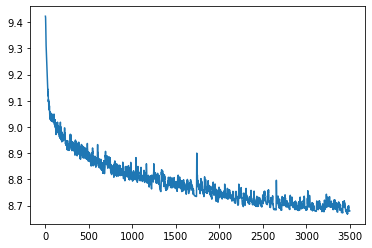

In [20]:
plt.plot(history.history['loss'])